<h2> Análisis sintactico(parsing) de fechas</h2>

In [15]:
import pandas as pd
import numpy as np

#gráficos:
import seaborn as sns

#modulo para la implementación del tipo de objeto "datetime".
import datetime #Proporciona clases para la manipulación de fechas y horas.

#leemos los datos

deslaves_df = pd.read_csv('datos/deslaves/deslaves.csv')


np.random.seed(0)

In [8]:
deslaves_df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


<hr>
· Vamos a estar trabajando con la columna 'date' del DataFrame. Nosotros cómo humanos sabemos que se trata de una fecha, pero Python todavia no.




In [9]:
deslaves_df['date'].head() #estas fechas cumplen el orden: mm/dd/aa. Los datos son del tipo objeto.
#el tipo del objeto también se puede saber con .dtype

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

<hr>
<p>Ahora que sabemos que nuestra columna de datos no es reconocida del tipo "datetime64", es momento de convertirla para que se pueda reconocer cómo una fecha. Esto es conocido cómo parseo de fechas(<i>Parsing dates</i>), porque tomamos cadenas de caracteres e identificamos las partes que le componen.</p>

<p>Podemos determinar cual es el formato de nuestras fechas con la guia en <a href = 'https://strftime.org/'> "strftime directive"</a>. La idea basica es que debemos indicar donde estan las partes de la fecha y cual es la puntuación entre estas. </p>
<p>Por ejemplo:<br>
    <li>17-1-2007 tiene el formato "%d-%m-%Y"</li>
    <li>16/04/2001 es %d/%m/%Y</li>
    <li>1/17/07 tiene el formato "%m/%d/%y"</li></p>

In [10]:
deslaves_df['date'] #el formato de nuestros datos es mm/dd/aa, su formato => %m/%d/%y

0        3/2/07
1       3/22/07
2        4/6/07
3       4/14/07
4       4/15/07
         ...   
1688    12/7/15
1689    2/22/16
1690    2/23/16
1691    2/26/16
1692     3/2/16
Name: date, Length: 1693, dtype: object

<p>Ahora pasamos a crear una nueva columna ('date_parsed') con los datos transformados al tipo de datos "datetime64[ns]":</p>

In [11]:
deslaves_df['date_parsed'] = pd.to_datetime(deslaves_df['date'], format="%m/%d/%y")
deslaves_df['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

<hr>
<p>Ahora que tenemos una columna con las fechas parseadas, podemos interactuar y extraer información cómo el día de mes en que ocurrio un deslave.<br><br>
    Si trataramos de tener la misma información en la columna original '<i>date</i>' de los datos, obtendriamos un error.<br><br> Esto es debido a que dt.day no sabe cómo manejar una columna del tipo de datos "object". Por eso, aunque nuestro dataframe tiene fechas, debemos "parsearlas" para poder interactuar con estas de forma útil.</p>

In [12]:
dias_del_mes_deslaves = deslaves_df['date_parsed'].dt.day
dias_del_mes_deslaves.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

<AxesSubplot:xlabel='date_parsed', ylabel='Count'>

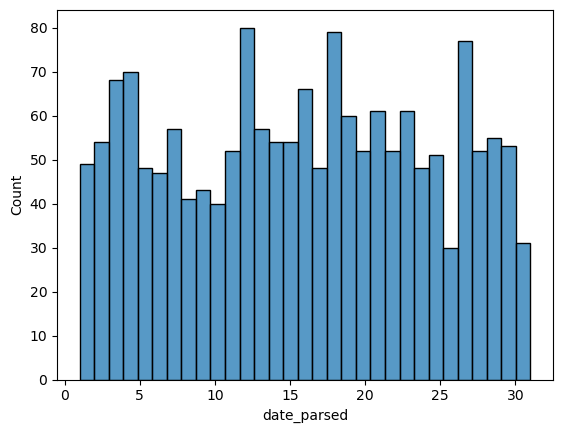

In [13]:
#Graficamos los días de la columna para comprobar que no nos hemos equivocado los días con los meses
dias_del_mes_deslaves = dias_del_mes_deslaves.dropna()
sns.histplot(dias_del_mes_deslaves, kde = False, bins = 31)